# 2020 BC Election Analysis

## Abstract

The purpose of the project are using the data scrapt from Tweeter to apply some machine learning models to predict the result of the election. There are serveral training model will applied to the words that the people post on the tweeter. The result that will give to a tweeter for "support" or "not support". 

The dataset are driectly scrapt from tweeter with the tweeter developer account. The data will pre-cleaned with serveral ways and the cleaned data will only contains the words.

The python notebook will get the brief instruction of the process that used in the analysis and the use of various methods. 

There are total of 4 parts of the data will be extracted from the tweeter, The data that related to the general topics of the election and the topics related to the specific candiantes. The topics "#Biden" and "Trump" are slected to use for general topics. However, although this study are very limited becuase only use one topic for each candiantes but it do conatins large number of the data for each hastages.  

This analysis are based on the data that the people post on the tweeter. The project are only used for research. 

## Geting the data

In [1]:
#Modele use in the notebook
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import re
import preprocessor as p
from collections import Counter
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image


import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('stopwords')
#nltk.download('wordnet')

### Get the General Topics

In [4]:
consumer_key= "h0C45xyA0r2OQfbltVZEWi8zU"
consumer_secret  = "E7d9cTfXahaFuQ5j1U5SAjKfd4M0re8VOl9gxLGIgmMN2pzKni"
access_token ="1312170158924820481-piYCABCvJjdLbgZiFTTkW8oj8lYzMU"
access_token_secret= "bc2jn6tUQ53odZizZ8BwHRSgln2BorD2k4ZlYyyn4WaTs"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-1"
date2 = "2020-11-3"

#post date
date =[]
#user id for the user
user_id = []
#verified or not
verified = []
#user name
user_name = []
#the twitter text
text = []
#user location
location = []
#from which device
source = []
#the data for the followers
likes = []
followers = []
following = []
retweets = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.created_at)
        date.append(tweet.created_at)
        print(tweet.id)
        user_id.append(tweet.id)
        print(tweet.user.verified)
        verified.append(tweet.user.verified)
        print(tweet.user.screen_name)
        user_name.append(tweet.user.screen_name)
        print(tweet.text)
        text.append(tweet.text)
        print(tweet.user.location)
        location.append(tweet.user.location)
        print(tweet.source)
        source.append(tweet.source)
        print(tweet.favorite_count)
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#Trump2020"+" -filter:retweets")  
#get_tweets(date1,date2,"#BCelxn2020"+" -filter:retweets")
#Zip the data
data1 = list(zip(date,user_id,verified,user_name,text,location,source,likes,followers,following,retweets))
df1 = pd.DataFrame(data =data1, columns =["Date","User.id","Verified","User Name","Tweet",
                                   "Location","Source","Likes","Followers","Following","Retweets"])

df1.to_csv(r'C:\Users\brand\Desktop\Make More Difference\2020 Election Project\Data\Trump.csv',mode='a',encoding='utf-8')    


#### Processing the Data

In [2]:
df= pd.read_csv(
    r'C:\Users\brand\Desktop\Make More Difference\2020 Election Project\Biden.csv',error_bad_lines=False)

In [3]:
#to see the attributes of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183996 entries, 0 to 183995
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  183996 non-null  int64 
 1   Date        183996 non-null  object
 2   User.id     183996 non-null  int64 
 3   Verified    183996 non-null  bool  
 4   User Name   183996 non-null  object
 5   Tweet       183996 non-null  object
 6   Location    131075 non-null  object
 7   Source      183955 non-null  object
 8   Likes       183996 non-null  int64 
 9   Followers   183996 non-null  int64 
 10  Following   183996 non-null  int64 
 11  Retweets    183996 non-null  int64 
dtypes: bool(1), int64(6), object(5)
memory usage: 15.6+ MB


In [4]:
#as the date are in the type object
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [5]:
#check the sucessful of the datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183996 entries, 0 to 183995
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  183996 non-null  int64         
 1   Date        183996 non-null  datetime64[ns]
 2   User.id     183996 non-null  int64         
 3   Verified    183996 non-null  bool          
 4   User Name   183996 non-null  object        
 5   Tweet       183996 non-null  object        
 6   Location    131075 non-null  object        
 7   Source      183955 non-null  object        
 8   Likes       183996 non-null  int64         
 9   Followers   183996 non-null  int64         
 10  Following   183996 non-null  int64         
 11  Retweets    183996 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(6), object(4)
memory usage: 15.6+ MB


In [6]:
#to check if there are any null rows in the dataset
df.isnull().sum()

Unnamed: 0        0
Date              0
User.id           0
Verified          0
User Name         0
Tweet             0
Location      52921
Source           41
Likes             0
Followers         0
Following         0
Retweets          0
dtype: int64

The null result will not have significant influence to the data analysis




### Data Clean Process

Starting from here, the following part are aiming using the processor to clean the dataset. The main point to do this process is to delete the symbols or other elements except words. Then we can traning the words sets as positive or negative. 

As for setting the processor, the emojis, usernames,URLS, hashtages and RT(reserved words) will be deleted. 



In [7]:
#setting the processor 
p.set_options(p.OPT.URL, p.OPT.EMOJI,p.OPT.MENTION,p.OPT.HASHTAG,p.OPT.RESERVED)

#Creat a new column named "Cleaned Tweet" stores the tweeter after processing
df['Cleaned Tweet']=[p.clean(i) for i in df['Tweet']]

#show the result
df['Cleaned Tweet']

0          Biden - 290 Trump - 248 Easy money babbyyyyyyy!!
1         Votes get whittled down? Counting of mail in b...
2         He has to have evidence if he is to present to...
3         You jump the gun every time ! So desperate to ...
4         You are deluded. is going to bring to USA. Get...
                                ...                        
183991                 My Mom and I voted on Sunday for !!!
183992    LOL. because it's a lie. Things only trend whe...
183993    Tell us how your really feel, Pia-don't hold a...
183994    So many loonies working themselves up into a t...
183995                 Voting in NY for the first time!!!!!
Name: Cleaned Tweet, Length: 183996, dtype: object

In order to analysis the data, we might need to converting to the lower case and also remove the punctuations

In [8]:
#converting to lower case
df['Cleaned Tweet']=[i.lower() for i in df['Cleaned Tweet']]

#remove the punctuations
df['Cleaned Tweet']=[re.sub('[^a-zA-Z]',' ',i) for  i in df['Cleaned Tweet']]

df['Cleaned Tweet']

0          biden       trump       easy money babbyyyyyyy  
1         votes get whittled down  counting of mail in b...
2         he has to have evidence if he is to present to...
3         you jump the gun every time   so desperate to ...
4         you are deluded  is going to bring to usa  get...
                                ...                        
183991                 my mom and i voted on sunday for    
183992    lol  because it s a lie  things only trend whe...
183993    tell us how your really feel  pia don t hold a...
183994    so many loonies working themselves up into a t...
183995                 voting in ny for the first time     
Name: Cleaned Tweet, Length: 183996, dtype: object

Upon now,  the data are showing we might have duplicated tweeters. This is because may be some hot sentances or slogon are using for many tweeters. 

In [9]:
#detecting the duplicate tweeters
df['Cleaned Tweet'].duplicated().sum()

22569

In [10]:
#drop the duplicates
df = df.drop_duplicates(subset = 'Cleaned Tweet', keep = 'first',ignore_index = True)
df.shape

(161427, 13)

## Data Analysis

### Visulization 

First we need to see how many tweeters are posting for each day from 10-11-2020 to 10-19-2020

In [11]:
Numbers_of_tweet_each_day=df['Date'].dt.date.value_counts(sort=False).sort_index()
Numbers_of_tweet_each_day




2020-10-29     9164
2020-10-30     9751
2020-10-31    10046
2020-11-01    11420
2020-11-02    16606
2020-11-03    24813
2020-11-04    48745
2020-11-05    30882
Name: Date, dtype: int64

Text(0.5, 1.0, 'Count Of posted Tweets On Each Day')

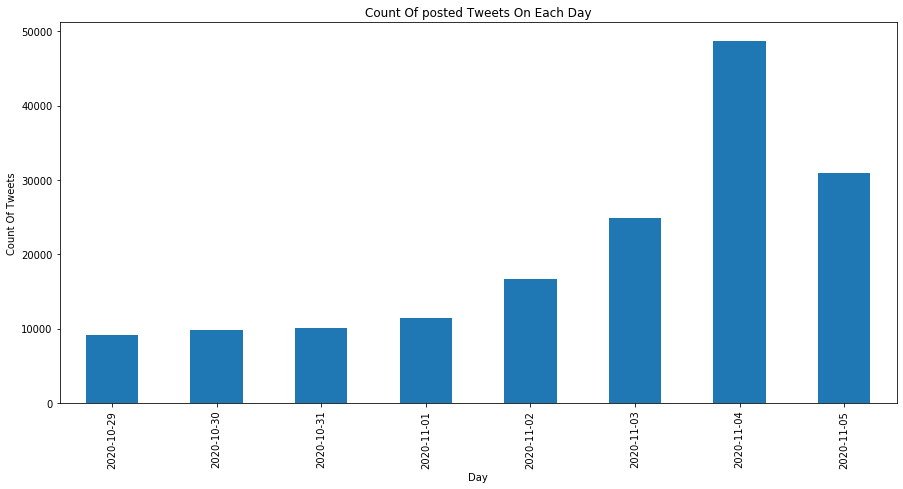

In [12]:
fig = plt.figure(figsize = (15,7))
Numbers_of_tweet_each_day.plot.bar()
plt.xticks(range(len(Numbers_of_tweet_each_day)))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of posted Tweets On Each Day")

Here we can find that the 2020-11-4 has the most number of the tweeters being posted. That is the official start vote day. 

#### Word cloud

Then we can output the most common words in the tweeter,  and we selected most 100 words except the stop words

In [13]:
#set the stop words
stop_words=set(stopwords.words('english'))
stop_words=list(stop_words)
#add more customized stop words
customized_stop_words=['Election','votes','poli','election','elxn','station']
stop_words=stop_words+customized_stop_words
print(stop_words)

['aren', 'as', 'themselves', "wouldn't", 'yourselves', 'am', 'above', 'in', 'both', 'y', "hadn't", 'them', 'after', 'no', 'than', 'most', 'between', 'shan', 'now', 'such', 'the', 'me', 'by', 'of', 'off', 'then', 'those', 'o', 'they', 'nor', 'other', 'once', 'is', 'again', "wasn't", 'or', 'which', 'be', "weren't", 'very', 'its', 'into', 'up', 'there', 'haven', 'wouldn', 'just', 'during', 'for', 'ma', 'your', 'where', "haven't", 'did', 'too', 'all', 'with', 'own', "shouldn't", 'my', 'being', 'how', 'isn', 've', 'not', 'wasn', 'it', "didn't", 'that', 'hadn', 'through', 'having', 'will', "you'll", 'mustn', "she's", 'from', 'at', 'are', 'some', 'needn', "isn't", "should've", 'himself', 'theirs', "hasn't", 'm', 'won', 'our', "you're", 'can', 'itself', 'so', 'her', 'she', 'their', 'but', 'hers', "couldn't", 'herself', 'do', 'under', 'if', 'when', 'out', 'don', 'why', 'been', 'couldn', 'has', 'should', "mustn't", 'i', 'hasn', 'yourself', 'mightn', 're', 'll', 'him', 'a', 'his', 'only', "needn'

In [14]:
# then remove the stop words from the tweet
df['Cleaned Tweet']=df['Cleaned Tweet'].apply(lambda x:' '.join(w for w in x.split()if w not in stop_words))

In [15]:
tweet_tokenizer = TweetTokenizer()
df['Cleaned Tweet']=df['Cleaned Tweet'].apply(lambda x:tweet_tokenizer.tokenize(x))


##### Tokenizing

After set the the stop words, we need to do the tokenizing, for tweeter, it is best to use the tweetTokenizer

##### Stemming


As we can see from above, there are some token are shows as "b","c" or other not a good words, but we still need to clean it, Let us try stemming and Lemmatisation to see if they can catch the errors or not. Aslo, stemming and lemmatisation will return the words to a general phrase.

In [16]:
stemmer=PorterStemmer()

df['Cleaned Tweet'] = df['Cleaned Tweet'].apply(lambda x: [stemmer.stem(words) for words in x]) 

In [17]:
Lemmatizer=WordNetLemmatizer()
df['Cleaned Tweet']=df['Cleaned Tweet'].apply(lambda x: [Lemmatizer.lemmatize(words) for words in x])

The next step is to split the sentance to words and store in a list, remove the duplicated words.

In [18]:
Cleaned_Tweet=df['Cleaned Tweet']
Cleaned_Tweet.tolist()

,
  'europ',
  'thank',
  'make',
  'w'],
 ['ghost', 'john', 'mccain', 'need', 'close'],
 ['control', 'year', 'watch', 'mcconnel', 'v', 'obama', 'know'],
 ['tune',
  'pm',
  'watch',
  'give',
  'last',
  'speech',
  'white',
  'hous',
  'lame',
  'duck'],
 ['cnn', 'joy', 'watch'],
 ['state', 'get'],
 ['earn',
  'xlm',
  'coinbas',
  'take',
  'short',
  'quiz',
  'refer',
  'other',
  'use',
  'invit',
  'link'],
 ['trump', 'make', 'remark', 'pm', 'et', 'accord'],
 ['gain',
  'vote',
  'count',
  'grind',
  'trump',
  'clan',
  'lawsuit',
  'want',
  'emphas',
  'purpos'],
 ['disappoint', 'grandpa', 'vote', 'biden', 'aliv', 'staunch', 'republican'],
 ['break', 'news', 'mail', 'put', 'top', 'win', 'know', 'putti'],
 ['squeaki',
  'bottom',
  'time',
  'torus',
  'hq',
  'even',
  'dumdum',
  'wishin',
  'nicer'],
 ['rate', 'next', 'philli', 'updat', 'could', 'put', 'lead'],
 ['elect', 'biden', 'serv', 'year', 'becom', 'p'],
 ['live',
  'scumbag',
  'deservedli',
  'lose',
  'scumbag',


In [19]:
Biden_words=[]
for words in Cleaned_Tweet:
    for word in words:
        Biden_words.append("".join(word))
pd.value_counts(Biden_words).nlargest(50)

vote        20720
trump       18325
biden       17978
win         17601
presid      10053
go           9685
joe          9536
u            9353
amp          8206
like         7721
get          6886
state        6100
peopl        5969
america      5551
count        5522
say          5464
need         4971
support      4814
know         4794
one          4754
american     4573
let          4553
day          4547
want         4488
make         4380
think        4241
time         4159
would        4029
call         3991
look         3913
lead         3826
right        3680
hope         3588
see          3562
come         3531
take         3514
good         3465
still        3461
year         3430
elect        3306
today        3242
plea         3134
even         3011
poll         2904
new          2895
democrat     2884
im           2859
watch        2794
result       2778
campaign     2743
dtype: int64

In [20]:
#now we need to remove the stop_words again because after stemming the words coverting to general verse
more_stop_words=['vote','say','would',"u","im"]
stop_words=stop_words+more_stop_words

Biden_words=[words for words in Biden_words if words not in stop_words]

In [21]:
Most_Common_Biden=Counter(Biden_words).most_common(200)

for the word cloud will only show the top 200 words that shows most occursionally. 

In [22]:
#list that will use for the word cloud
word_cloud_Biden=[]
for words in Most_Common_Biden:
    word_cloud_Biden.append(words[0])
#word_cloud_Biden

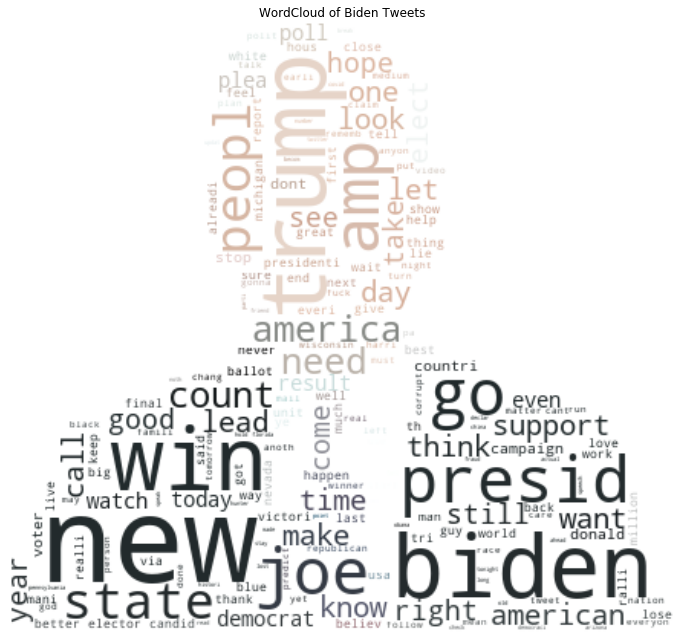

In [23]:
#word cloud

#load the image with Biden
Image_array = np.array(Image.open(r'C:\Users\brand\Desktop\Make More Difference\2020 Election Project\Image\Biden.png'))

image_color = ImageColorGenerator(Image_array )


wc = WordCloud(mask=Image_array, color_func=image_color, background_color='white').generate(' '.join(word_cloud_Biden))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wc,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Biden Tweets")
plt.show()

The wordcloud can help us to see what is the hottest topics will mentioned under the biden's hastages. 

## Sentiment Analyis

As for tweeter, we will use Sentiment anlysis tool thorugh nlkr package
